In [2]:
import pandas as pd
from scipy.stats import kstest

In [3]:
%matplotlib inline
from matplotlib.pyplot import *

In [4]:
lwt = pd.read_csv(r"D:\Annies_Dissertation\Analysis\Regression\Lamb\Lamb_weather_types.csv")

In [5]:
lwt = lwt[lwt.year > 2000]

In [6]:
lwt[:5]

day  month  year  PM_1000     W     S     F     Z     G    Dir  LWT
47482    1      1  2001    -14.1   6.4  24.4  25.3  68.6  42.6  194.7   20
47483    2      1  2001     -9.2   9.5   2.4   9.8  81.6  42.0  255.6   20
47484    3      1  2001     -7.7  15.6  20.6  25.9  36.6  31.7  217.3   25
47485    4      1  2001     -6.6   8.4   2.3   8.7  53.4  28.1  254.4   20
47486    5      1  2001     -9.1   5.3  -3.0   6.1  52.7  27.0  299.9   20

In [7]:
AP = pd.read_csv(r'D:\Annies_Dissertation\Analysis\Regression\Lamb\AP_Cities.csv')

In [8]:
AP = AP.rename(columns={'value': 'PM25'})

In [9]:
Soton_AP = AP.loc[AP['City'] == 'E06000045']

In [10]:
Soton_AP[:5]

Unnamed: 0        time       City       PM25  month  year  day
2396        2692  2000-02-25  E06000045  14.118634      2  2000   25
2397        2693  2000-02-26  E06000045  20.691448      2  2000   26
2398        2694  2000-02-28  E06000045  20.323462      2  2000   28
2399        2696  2000-03-03  E06000045  17.397324      3  2000    3
2400        2697  2000-03-04  E06000045  16.998253      3  2000    4

In [11]:
Soton_lwt_AP = pd.merge(lwt, Soton_AP, on=['year', 'month', 'day'])

In [13]:
figure(figsize=(24,14))
soton = Soton_lwt_AP.groupby('LWT')

In [17]:
kstest(Soton_AP.PM25, 'norm')

KstestResult(statistic=0.98559972767235449, pvalue=0.0)

D:\Anaconda3\lib\site-packages\pandas\tools\plotting.py:3082: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  rot=rot, grid=grid, **kwds)


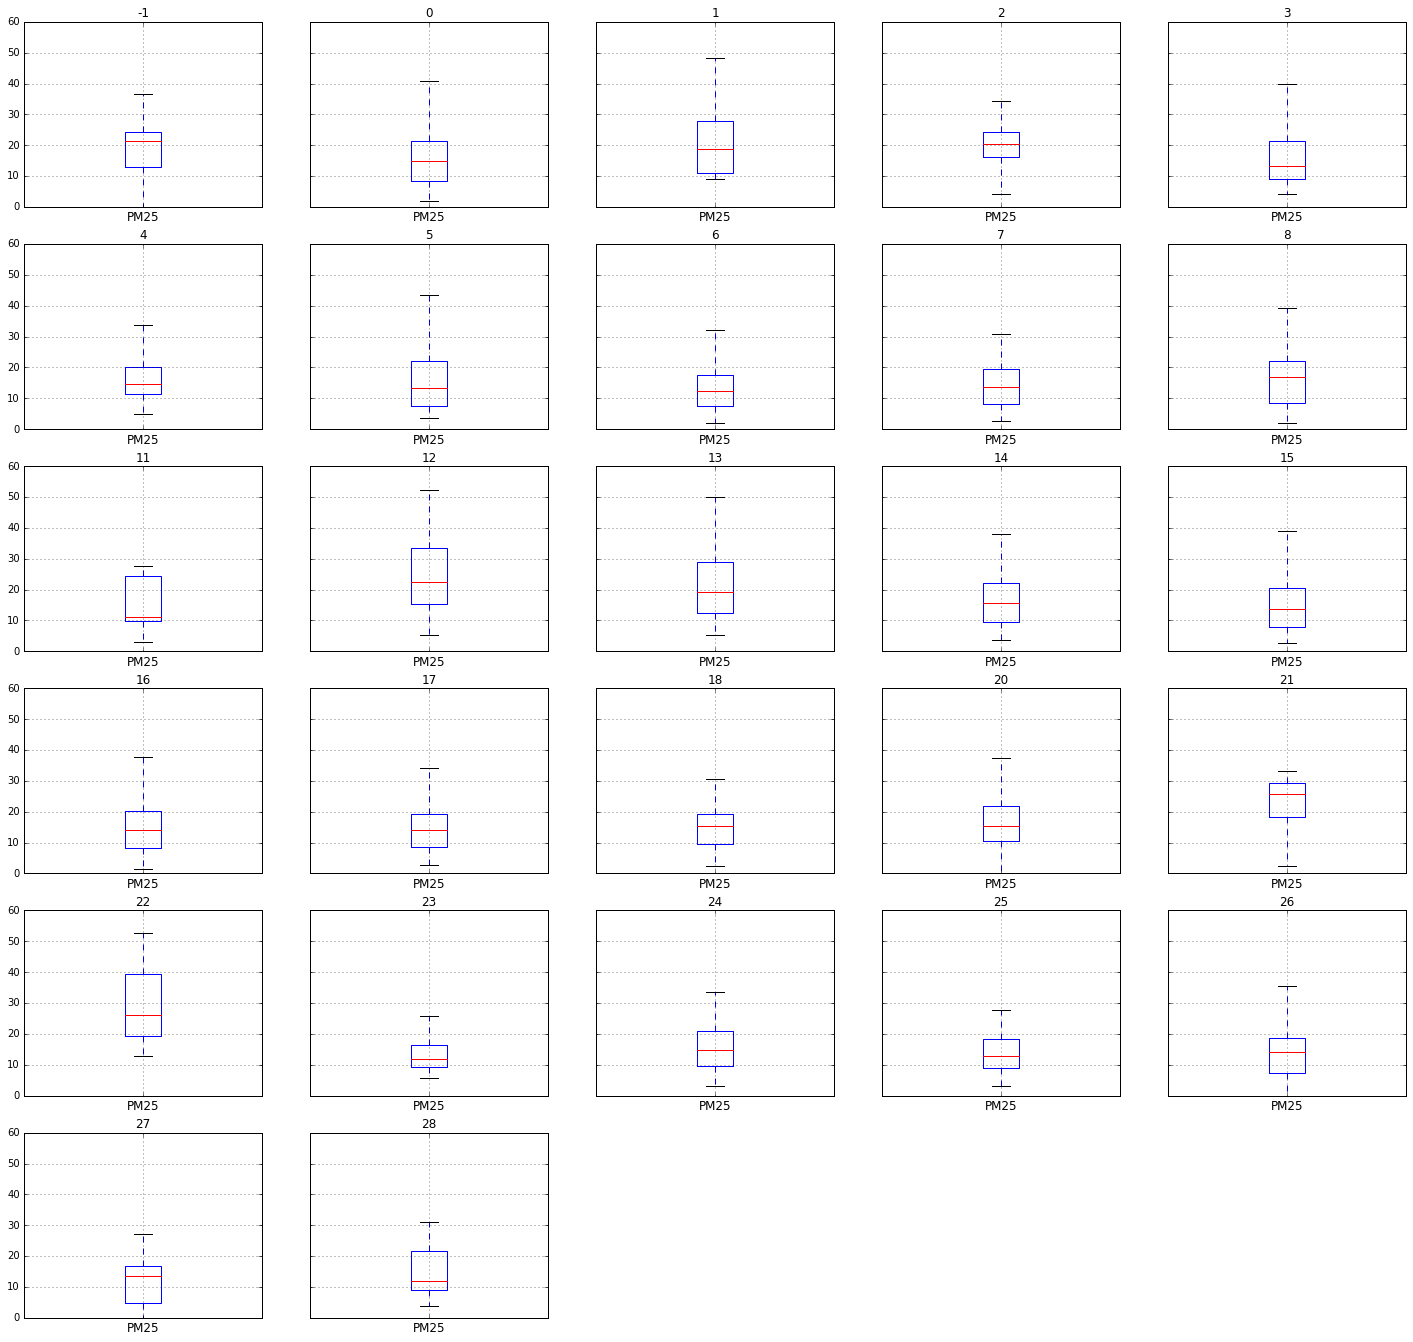

In [23]:
figure()
soton.boxplot(subplots=True, column=['PM25'], figsize=(24,24), showfliers=False, fontsize = 12)
savefig(r'D:\Annies_Dissertation\Analysis\Regression\Lamb\Boxplot_soton.png')

In [11]:
lwt.groupby(['year', 'month']).apply(lambda x:x.LWT.value_counts().index[0])

year  month
2001  1        20
      2         0
      3        20
      4        20
      5         0
      6        17
      7         0
      8        20
      9         0
      10       20
      11        0
      12        0
2002  1        15
      2        16
      3        16
      4         0
      5        20
      6        20
      7         0
      8         0
      9         0
      10        0
      11       20
      12       20
2003  1        16
      2         0
      3         0
      4         0
      5        20
      6         0
               ..
2014  3        15
      4        13
      5        20
      6         0
      7         0
      8        20
      9         0
      10       15
      11       20
      12       16
2015  1        16
      2         0
      3         0
      4         0
      5        17
      6         0
      7         0
      8        20
      9         0
      10        0
      11       16
      12       15
2016  1        20
      2        1

In [18]:
Bmth_AP = AP.loc[AP['City'] == 'E06000028']

In [19]:
Bmth_lwt_AP = pd.merge(lwt, Bmth_AP, on=['year', 'month', 'day'])

In [20]:
Bmth_lwt_AP[:5]

day  month  year  PM_1000     W     S     F     Z     G    Dir  LWT  \
0    1      1  2001    -14.1   6.4  24.4  25.3  68.6  42.6  194.7   20   
1    7      1  2001      7.9  17.3 -11.2  20.6  38.0  28.0  303.0   27   
2   12      1  2001     22.1  -9.7   9.7  13.7 -44.2  26.0  135.1    0   
3   13      1  2001     25.9  -0.7  12.9  12.9 -38.2  23.0  176.9    0   
4   14      1  2001     25.1   0.0  11.9  11.9 -56.0  30.4  179.8    0   

   Unnamed: 0        time       City       PM25  
0         128  2001-01-01  E06000028  17.488951  
1         131  2001-01-07  E06000028   6.870576  
2         133  2001-01-12  E06000028   3.535006  
3         134  2001-01-13  E06000028   8.494726  
4         135  2001-01-14  E06000028   3.992900

In [21]:
figure(figsize=(24,14))
bmth = Bmth_lwt_AP.groupby('LWT')

D:\Anaconda3\lib\site-packages\pandas\tools\plotting.py:3082: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  rot=rot, grid=grid, **kwds)


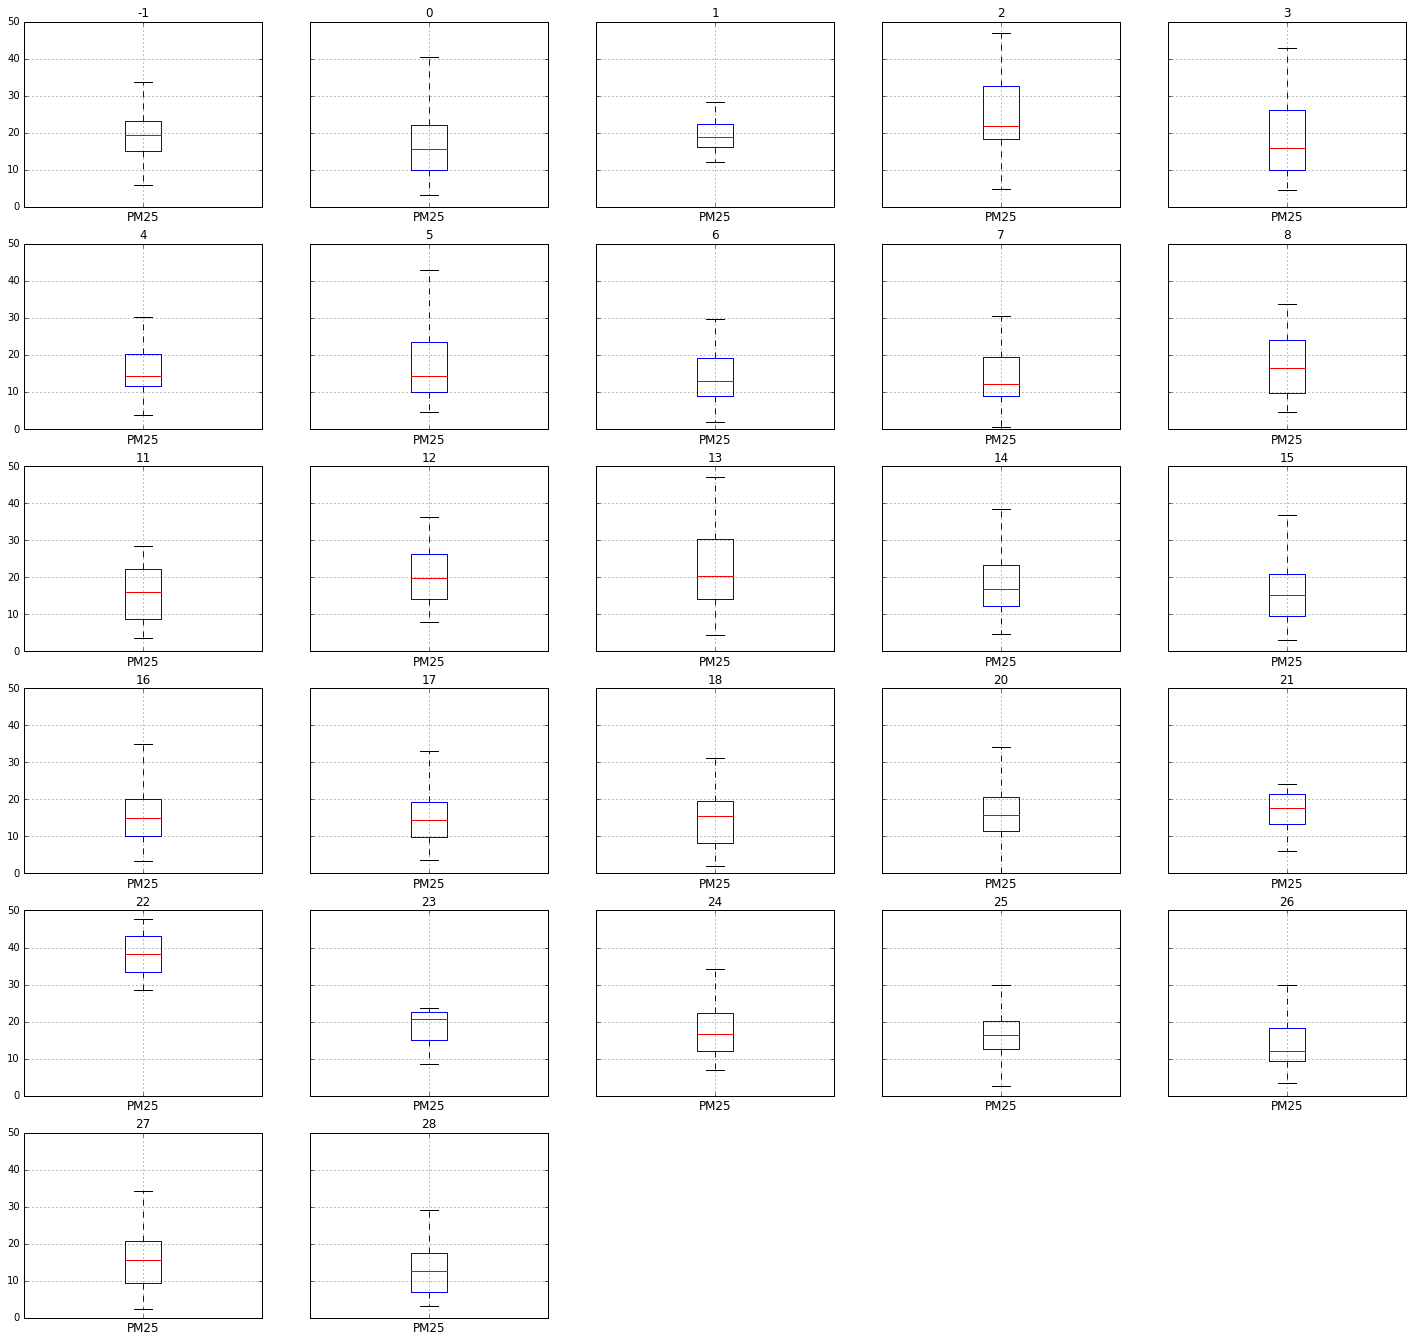

In [22]:
figure()
bmth.boxplot(subplots=True, column=['PM25'], figsize=(24,24), showfliers=False, fontsize = 12)
savefig(r'D:\Annies_Dissertation\Analysis\Regression\Lamb\Boxplot_bmth.png')